In [1]:
from sklearn import datasets

mnist = datasets.fetch_openml('mnist_784', version = 1)
features = mnist["data"]

print(features.shape)

(70000, 784)


In [5]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(features)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

d

154

In [6]:
pca = PCA(n_components=d)
features_reduced = pca.fit_transform(features)

features_reduced.shape

(70000, 154)

In [8]:
rnd_pca = PCA(n_components=d, svd_solver="randomized")
features_reduced = rnd_pca.fit_transform(features)

features_reduced.shape

(70000, 154)

In [13]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=d)

for batch in np.array_split(features, n_batches):
    inc_pca.partial_fit(batch)
    
reduced_features = inc_pca.transform(features)

reduced_features.shape

(70000, 154)

In [ ]:
from sklearn.decomposition import KernelPCA

k_pca = KernelPCA(n_components = d, kernel ='rbf', gamma=0.04)
featured_reduced_kpca = k_pca.fit_transform(features)

features_reduced_kpca.shape

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf = Pipeline([
    ("Kernal PCA", KernelPCA(n_components=d)),
    ("log_reg", LogisticRegression())
])

param_grd = [{
    'kpca_gamma':np.linspace(0.03, 0.05, 10),
    'kpca_kernel': ['rbf', 'linear', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(features)

In [2]:
import numpy as np

np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [3]:
X.shape

(10000, 784)

In [4]:
y.shape

(10000,)

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_scaled)

X_reduced.shape

from sklearn.preprocessing import MinMaxScaler

min_max_sclaer = MinMaxScaler()
X_reduced_scaled = min_max_sclaer.fit_transform(X_reduced)
y_scaled = min_max_sclaer.fit_transform(y)

ValueError: RGBA values should be within 0-1 range

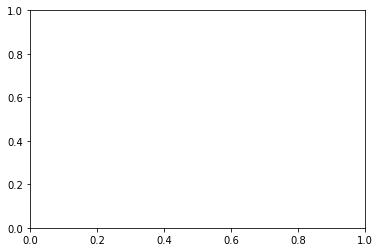

In [26]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(13,10))
plt.scatter(X_reduced_scaled[:, 0], X_reduced_scaled[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [29]:
y_temp = y.reshape(-1,1)
y_scaled = min_max_sclaer.fit_transform(y)

ValueError: Expected 2D array, got 1D array instead:
array=[7. 3. 8. ... 9. 8. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [31]:
X_reduced[:, 0] += min(X_reduced[:, 0])
X_reduced[:, 0] /= (max(X_reduced[:, 0]) - min(X_reduced[:, 0]))

X_reduced[:, 0]

array([82.126205, 82.76822 , 82.49695 , ..., 82.48221 , 82.60127 ,
       82.28291 ], dtype=float32)

In [32]:
X_reduced[:, 0] / (max(X_reduced[:, 0]) - min(X_reduced[:, 0]))

array([82.126205, 82.76822 , 82.49695 , ..., 82.48221 , 82.60127 ,
       82.28291 ], dtype=float32)

In [38]:
temp = np.array([[1],[2],[3],[4]])
print(temp.shape)
temp = temp.reshape(1,-1)
print(temp)

(4, 1)
[[1 2 3 4]]


In [35]:
y.shape

(10000,)

In [41]:
temp = y.reshape(-1,1)
print(temp)

[['7']
 ['3']
 ['8']
 ...
 ['9']
 ['8']
 ['1']]
